# Visualization Script

In [1]:
# Imports
%load_ext autoreload
%autoreload 2
%matplotlib inline

import hydra
from hydra import initialize, compose
from hydra.core.hydra_config import HydraConfig

from predict import predict

2023-02-20 07:22:21.247783: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Read Config File

In [2]:
# clear previous hydra instances
hydra.core.global_hydra.GlobalHydra.instance().clear()

# configs/config.yaml
initialize(version_base=None, config_path="configs")
cfg = compose(config_name="config", return_hydra_config=True)
HydraConfig().cfg = cfg

For visualization two options are available
1: Visualize from directory
2: Visualize from list
In both cases mask is optional
You can also override these settings through command line and call predict.py

## 1: Visualize from directory
In case of visualization from directory, it's going to make prediction and show all images from given directory.
Override the validation data paths and make sure the directory paths are relative to the project base/root path

In [3]:
# e.g. to visualize validation data
# images_paths = "/data/val/images"
# mask_paths = "/data/val/mask"

## 2: Visualize from list
In case of visualization from list, each list element should contain absolute path of image/mask.

In [4]:
# e.g. to visualize two images with their corresponding mask
images_paths = [
    "/workspace/unet3p/data/val/images/image_0_48.png",
    "/workspace/unet3p/data/val/images/image_0_21.png",
]
mask_paths = [
    "/workspace/unet3p/data/val/mask/mask_0_48.png",
    "/workspace/unet3p/data/val/mask/mask_0_21.png",
]

In [5]:
# override given settings
cfg.DATASET.VAL.IMAGES_PATH = images_paths
cfg.DATASET.VAL.MASK_PATH = mask_paths

In [6]:
# In both cases if mask is not available just set the mask path to None
# cfg.DATASET.VAL.MASK_PATH = None

In [ ]:
# For custom data visualization set SHOW_CENTER_CHANNEL_IMAGE=False. This should set True for only UNet3+ LiTS data.
cfg.SHOW_CENTER_CHANNEL_IMAGE=True

Using vgg19 as a backbone.


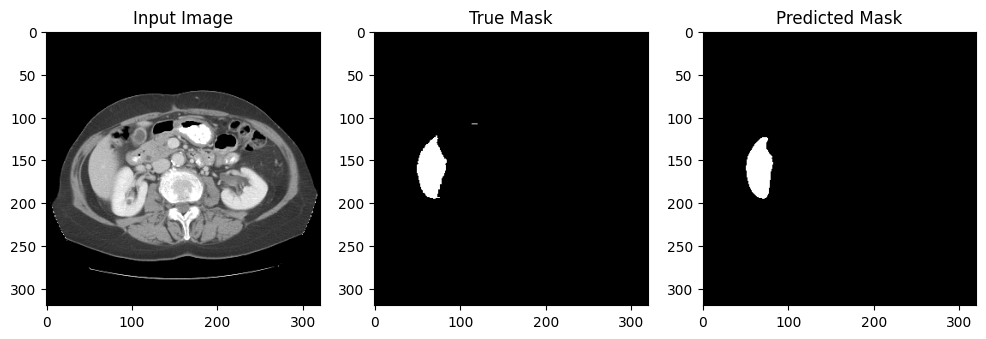

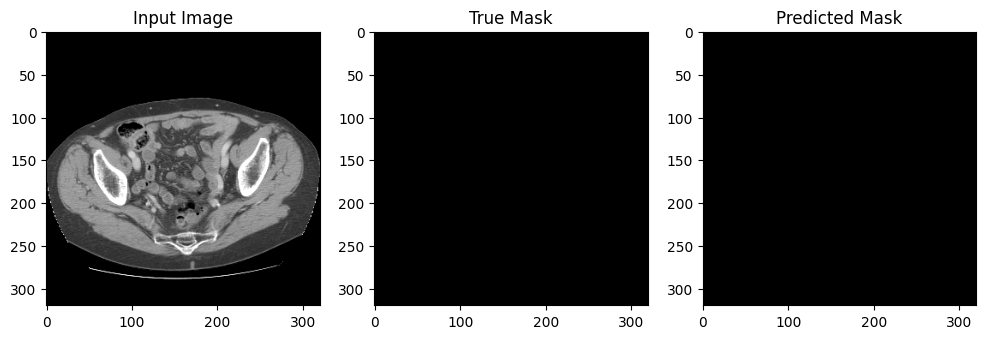

In [7]:
# make predictions
predict(cfg)